# Import libararies


In [146]:
#import the essental libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


from sklearn import svm

# import matrix


In [97]:
dataset= pd.read_csv("stroke.csv")


In [98]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [135]:
dataset.shape

(3565, 23)

In [100]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [101]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [107]:
dataset.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# check for missing values 

In [103]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [104]:
dataset['bmi'].fillna(dataset['bmi'].mean(),inplace=True)

# again check for missing values

In [105]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Explore categorical features

Gender column


In [117]:
dataset['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There is an other gender on the data, i will delet it 

In [118]:
dataset.drop(dataset.index[(dataset["gender"] == "Other")],axis=0,inplace=True)


In [119]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [120]:
dataset['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [121]:
dataset['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Somking Status Column

In [125]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

There is 1544 unknown, i will drop it 

In [126]:
dataset.drop(dataset.index[(dataset["smoking_status"] == "Unknown")],axis=0,inplace=True)


In [127]:
dataset['smoking_status'].value_counts()

never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [131]:
dataset = pd.get_dummies(dataset)

In [132]:
dataset.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_number,married_number,gender_Female,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,1,1,...,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,1,1,...,0,0,1,0,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,1,1,...,0,0,0,1,0,1,0,0,1,0


# Exploratotry Data Analysis

C:\Users\nojou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'relationship between age and stroke')

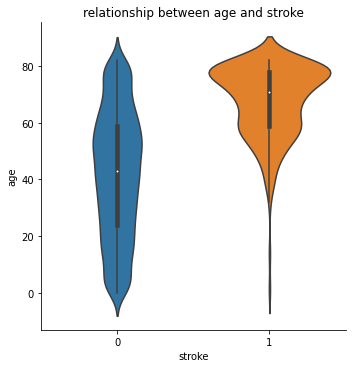

In [106]:
sns.catplot('stroke','age',data=dataset,kind='violin')
plt.title('relationship between age and stroke')

# Determine training and Testing data

In [138]:
X = dataset.drop('stroke',axis=1)
Y = dataset['stroke']

In [140]:
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_number,married_number,gender_Female,gender_Male,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,0,1,0,1,...,0,0,1,0,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,57.0,0,0,77.93,21.700000,1,1,1,0,...,0,0,1,0,0,1,0,0,1,0
5105,18234,80.0,1,0,83.75,28.893237,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,1,1,1,0,...,0,0,0,1,0,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0


In [141]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5102    0
5105    0
5106    0
5107    0
5108    0
Name: stroke, Length: 3565, dtype: int64

In [143]:
X.shape

(3565, 22)

In [144]:
Y.shape

(3565,)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [149]:
X_train.shape

(2852, 22)

In [150]:
y_train.shape

(2852,)

In [151]:
X_test.shape

(713, 22)

In [153]:
y_test.shape

(713,)

# Random Forest Classier

In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [155]:
RFC_Score = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",round(RFC_Score*100), '%')

Accuracy obtained by Random Forest Classifier model: 95 %


<AxesSubplot:>

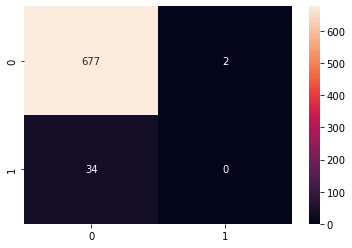

In [156]:
rfc_conf = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(rfc_conf,annot=True,fmt="d")